# **CODSOFT INTERNSHIP**

###**TASK - 1 : Titanic Survival Prediction**

Author : Sumit Ghughtyal

Domain : Data Science

Batch : August-24

## Importing the libraries

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [4]:
dataset = pd.read_csv('Titanic-Dataset.csv')

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset = dataset.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [7]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [9]:
print(X)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' nan ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


# Taking care of missing data

<Axes: >

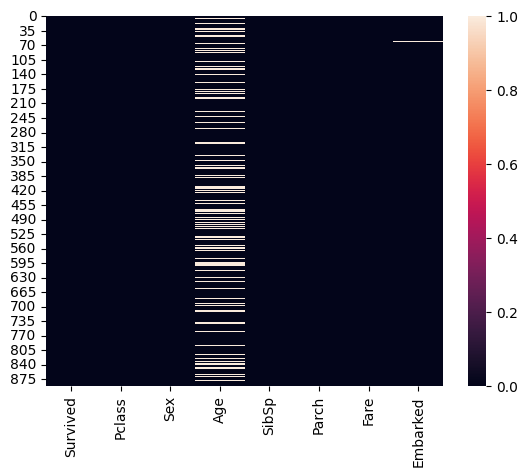

In [10]:
# Visualizing the missing values using heatmap
sns.heatmap(dataset.isnull())

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
age_data =X[:, 2].reshape(-1, 1)
imputer.fit(age_data)
X[:, 2] = imputer.transform(age_data).flatten()

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
embarked_data =X[:, -1].reshape(-1, 1)
imputer.fit(embarked_data)
X[:, -1] = imputer.transform(embarked_data).flatten()

In [13]:
print(X[61,:])

[1 'female' 38.0 0 0 80.0 'S']


## Encoding Categorical Data

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

In [15]:
print(X[:5,:])

[[3 1 22.0 1 0 7.25 'S']
 [1 0 38.0 1 0 71.2833 'C']
 [3 0 26.0 0 0 7.925 'S']
 [1 0 35.0 1 0 53.1 'S']
 [3 1 35.0 0 0 8.05 'S']]


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [17]:
print(X[:10,:])

[[0.0 0.0 1.0 3 1 22.0 1 0 7.25]
 [1.0 0.0 0.0 1 0 38.0 1 0 71.2833]
 [0.0 0.0 1.0 3 0 26.0 0 0 7.925]
 [0.0 0.0 1.0 1 0 35.0 1 0 53.1]
 [0.0 0.0 1.0 3 1 35.0 0 0 8.05]
 [0.0 1.0 0.0 3 1 28.0 0 0 8.4583]
 [0.0 0.0 1.0 1 1 54.0 0 0 51.8625]
 [0.0 0.0 1.0 3 1 2.0 3 1 21.075]
 [0.0 0.0 1.0 3 0 27.0 0 2 11.1333]
 [1.0 0.0 0.0 2 0 14.0 1 0 30.0708]]


## Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training CatBoost on the Training set

In [19]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.008911
0:	learn: 0.6871003	total: 48.6ms	remaining: 48.5s
1:	learn: 0.6837883	total: 53.2ms	remaining: 26.6s
2:	learn: 0.6788225	total: 56ms	remaining: 18.6s
3:	learn: 0.6737650	total: 62.7ms	remaining: 15.6s
4:	learn: 0.6688102	total: 67.9ms	remaining: 13.5s
5:	learn: 0.6641584	total: 72.6ms	remaining: 12s
6:	learn: 0.6599288	total: 75.4ms	remaining: 10.7s
7:	learn: 0.6547570	total: 79.7ms	remaining: 9.88s
8:	learn: 0.6501302	total: 83.8ms	remaining: 9.22s
9:	learn: 0.6453269	total: 87.4ms	remaining: 8.65s
10:	learn: 0.6403461	total: 90.1ms	remaining: 8.1s
11:	learn: 0.6353747	total: 97.7ms	remaining: 8.04s
12:	learn: 0.6309128	total: 102ms	remaining: 7.76s
13:	learn: 0.6271044	total: 107ms	remaining: 7.5s
14:	learn: 0.6232022	total: 109ms	remaining: 7.15s
15:	learn: 0.6186356	total: 113ms	remaining: 6.96s
16:	learn: 0.6144964	total: 117ms	remaining: 6.75s
17:	learn: 0.6102960	total: 120ms	remaining: 6.53s
18:	learn: 0.6065982	total: 121ms	remaining: 6.25s
19:	l

## Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[104   6]
 [ 23  46]]


0.8379888268156425

## Applying k-Fold Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6605790	total: 9.7ms	remaining: 1.38s
7:	learn: 0.6561064	total: 11.1ms	remaining: 1.38s
8:	learn: 0.6509304	total: 12.2ms	remaining: 1.34s
9:	learn: 0.6461857	total: 13.4ms	remaining: 1.33s
10:	learn: 0.6411295	total: 14.6ms	remaining: 1.32s
11:	learn: 0.6363719	total: 15.9ms	remaining: 1.31s
12:	learn: 0.6322359	total: 16.9ms	remaining: 1.28s
13:	learn: 0.6274169	total: 18ms	remaining: 1.26s
14:	learn: 0.6235144	total: 19.1ms	remaining: 1.25s
15:	learn: 0.6201032	total: 20.1ms	remaining: 1.24s
16:	learn: 0.6160007	total: 21.4ms	remaining: 1.24s
17:	learn: 0.6115781	total: 22.8ms	remaining: 1.24s
18:	learn: 0.6078487	total: 38.3ms	remaining: 1.98s
19:	learn: 0.6035678	total: 49.9ms	remaining: 2.44s
20:	learn: 0.5999498	total: 53.1ms	remaining: 2.47s
21:	learn: 0.5964621	total: 59.6ms	remaining: 2.65s
22:	learn: 0.5931218	total: 65.2ms	remaining: 2.77s
23:	learn: 0.5898008	total: 68.3ms	remaining: 2.78s
24:	learn: 0.5865329